## Import libraries for web scraping, data handling, and visualization

In [46]:
import requests
import requests as bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# URL of the first webpage to scrape

In [47]:
url = 'https://fbref.com/en/comps/22/Major-League-Soccer-Stats'

# Use requests to get the first page's HTML content.

In [49]:
url = 'https://fbref.com/en/comps/22/Major-League-Soccer-Stats'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

#  Find the table with the specified 'id' and 'class' attributes

In [50]:
table = soup.find('table', {'id': 'results2024221Eastern-Conference_overall', 'class': 'stats_table sortable min_width force_mobilize now_sortable'})


# Exploring Data table

In [51]:
# Find the table by id and class
table = soup.find('table', {'id': 'results2024221Eastern-Conference_overall'})

# Locate the header row to identify the index of the "Squad" column
headers = table.find('thead').find_all('th')
squad_index = None

# Find the index of the "Squad" column in the header
for idx, header in enumerate(headers):
    if 'Squad' in header.text:
        squad_index = idx
        break

# Check if the index was found
if squad_index is not None:
    # Extract all rows in the table's body section
    rows = table.find('tbody').find_all('tr')
    
    # Extract the "Squad" column data for each row
    squad_column_data = [row.find_all('td')[squad_index].text for row in rows if row.find_all('td')]
    
    # Print the data
    print(squad_column_data)
else:
    print("Squad column not found in the table headers.")


['34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34', '34']


## Extract the first table's tbody

In [52]:
table = soup.find_all('table')[0].tbody
for row in table.find_all('tr'):
    print(row.prettify())
    print('============================================')

<tr>
 <th class="right" csk="1" data-stat="rank" scope="row">
  1
 </th>
 <td class="left" data-stat="team">
  <img alt="Club Crest" height="13" itemscope="image" src="https://cdn.ssref.net/req/202411012/tlogo/fb/mini.cb8b86a2.png" style="vertical-align:text-top" width="13"/>
  <a href="/en/squads/cb8b86a2/Inter-Miami-Stats">
   Inter Miami
  </a>
 </td>
 <td class="right" data-stat="games">
  34
 </td>
 <td class="right" data-stat="wins">
  22
 </td>
 <td class="right" data-stat="ties">
  8
 </td>
 <td class="right" data-stat="losses">
  4
 </td>
 <td class="right" data-stat="goals_for">
  79
 </td>
 <td class="right" data-stat="goals_against">
  49
 </td>
 <td class="right" data-stat="goal_diff">
  +30
 </td>
 <td class="right" data-stat="points">
  74
 </td>
 <td class="right" data-stat="points_avg">
  2.18
 </td>
 <td class="right" data-stat="xg_for">
  53.8
 </td>
 <td class="right" data-stat="xg_against">
  53.0
 </td>
 <td class="right" data-stat="xg_diff">
  +0.8
 </td>
 <td cl

# scrape data from first web page and store in DataFrame

In [54]:
# Let say this'table' holds the correct <tbody> of your desired table
data = []

for row in table.find_all('tr'):
    # Find all cells in the row
    cells = row.find_all('td')
    
    # Define the actual column indices (adjust based on the table structure)
    squad_column_index = 0  # Adjust based on actual position
    mp_column_index = 1
    w_column_index = 2
    d_column_index = 3
    l_column_index = 4

    # Check if there are enough cells in the row to avoid an index error
    if len(cells) > max(squad_column_index, mp_column_index, w_column_index, d_column_index, l_column_index):
        # Extract text from each cell using the defined indices
        squad_name = cells[squad_column_index].text.strip()
        mp_name = cells[mp_column_index].text.strip()
        w_name = cells[w_column_index].text.strip()
        d_name = cells[d_column_index].text.strip()
        l_name = cells[l_column_index].text.strip()
        
        # Append the row to the data list as a dictionary
        data.append({
            "Squad": squad_name,
            "MP": mp_name,
            "W": w_name,
            "D": d_name,
            "L": l_name
        })
    

# Convert the data into a pandas DataFrame and display it
df = pd.DataFrame(data)
print(df)



                 Squad  MP   W   D   L
0          Inter Miami  34  22   8   4
1        Columbus Crew  34  19   9   6
2        FC Cincinnati  34  18   5  11
3         Orlando City  34  15   7  12
4            Charlotte  34  14   9  11
5                NYCFC  34  14   8  12
6         NY Red Bulls  34  11  14   9
7          CF Montréal  34  11  10  13
8          Atlanta Utd  34  10  10  14
9          D.C. United  34  10  10  14
10          Toronto FC  34  11   4  19
11  Philadelphia Union  34   9  10  15
12        Nashville SC  34   9   9  16
13       NE Revolution  34   9   4  21
14        Chicago Fire  34   7   9  18


# Question 1 
Which squad has achieved the highest number of wins?

The squad with the highest number of wins is: Inter Miami with 22 wins.


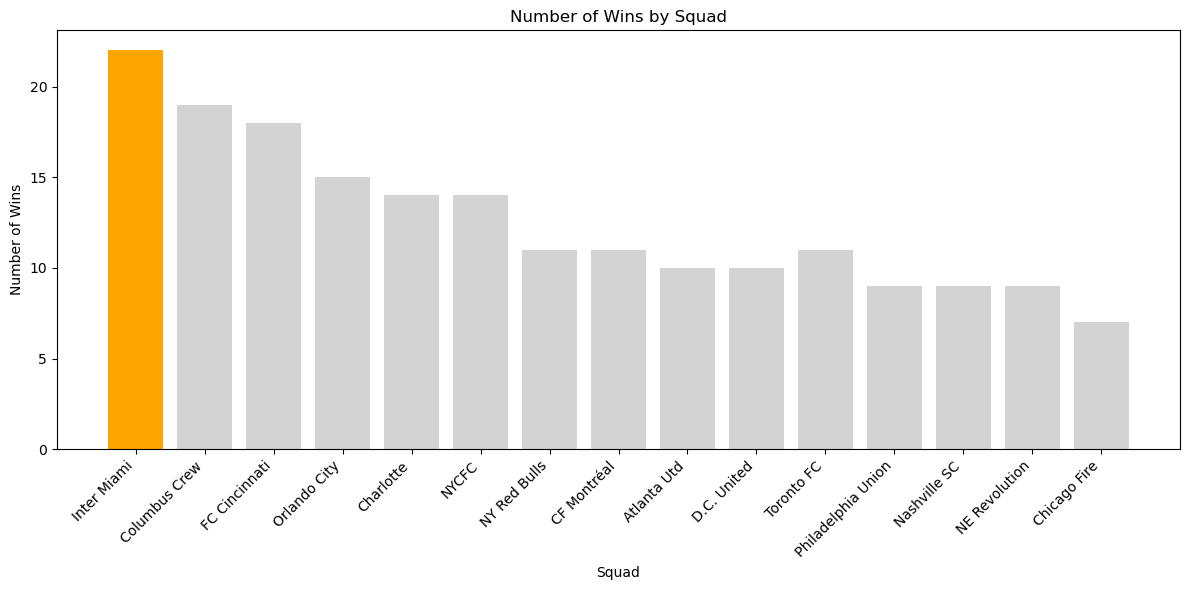

In [55]:
# Convert the 'W' column to numeric for comparison and visualization
df['W'] = pd.to_numeric(df['W'], errors='coerce')

# Find the squad with the highest number of wins
max_wins_row = df.loc[df['W'].idxmax()]

# Print the result
print(f"The squad with the highest number of wins is: {max_wins_row['Squad']} with {max_wins_row['W']} wins.")

# Plot a bar chart for visual representation
plt.figure(figsize=(12, 6))
plt.bar(df['Squad'], df['W'], color='lightgrey')
plt.xlabel('Squad')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Squad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Highlight the squad with the highest number of wins
plt.bar(max_wins_row['Squad'], max_wins_row['W'], color='orange')

plt.show()


# URL of the second webpage to scrape

In [56]:
url = 'https://fbref.com/en/squads/4a1b4ea8/Portugal-Men-Stats'

# Use request to get the second page's HTML content

In [207]:
url = 'https://fbref.com/en/squads/4a1b4ea8/Portugal-Men-Stats'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


# Find the table with the specified 'id' and 'class' attributes

In [57]:
table = soup.find('table', {'id': ' stats_standard_677', 'class': 'stats_table sortable min_width now_sortable'})

## Extract the second table's tbody

In [58]:
table = soup.find_all('table')[0].tbody
for row in table.find_all('tr'):
    print(row.prettify())
    print('============================================')

<tr>
 <th class="right" csk="1" data-stat="rank" scope="row">
  1
 </th>
 <td class="left" data-stat="team">
  <img alt="Club Crest" height="13" itemscope="image" src="https://cdn.ssref.net/req/202411012/tlogo/fb/mini.cb8b86a2.png" style="vertical-align:text-top" width="13"/>
  <a href="/en/squads/cb8b86a2/Inter-Miami-Stats">
   Inter Miami
  </a>
 </td>
 <td class="right" data-stat="games">
  34
 </td>
 <td class="right" data-stat="wins">
  22
 </td>
 <td class="right" data-stat="ties">
  8
 </td>
 <td class="right" data-stat="losses">
  4
 </td>
 <td class="right" data-stat="goals_for">
  79
 </td>
 <td class="right" data-stat="goals_against">
  49
 </td>
 <td class="right" data-stat="goal_diff">
  +30
 </td>
 <td class="right" data-stat="points">
  74
 </td>
 <td class="right" data-stat="points_avg">
  2.18
 </td>
 <td class="right" data-stat="xg_for">
  53.8
 </td>
 <td class="right" data-stat="xg_against">
  53.0
 </td>
 <td class="right" data-stat="xg_diff">
  +0.8
 </td>
 <td cl

# scrape data from second web page and store in DataFrame

In [210]:
#soup is your BeautifulSoup object containing the page's HTML
table = soup.find_all('table')[0].tbody  # Extracting the table body

# Initialize a list to store data
data = []

# Loop through each row in the table body
for row in table.find_all('tr'):
    # Find all <th> and <td> cells in the row (headers and data cells)
    cells = row.find_all(['th', 'td'])
    
    # Ensure the row has the necessary cells for scraping (at least 6 columns)
    if len(cells) >= 6:
        # Extract player name from the <a> tag inside <th> (first column)
        player_name = cells[0].find('a').text.strip() if cells[0].find('a') else cells[0].text.strip()
        
        # Extract other columns (Pos, Age, MP, Starts, Min)
        pos_name = cells[1].text.strip()  # Position
        age_name = cells[2].text.strip()  # Age
        mp_name = cells[3].text.strip()   # MP
        starts_name = cells[4].text.strip()  # Starts
        min_name = cells[5].text.strip()    # Minutes
        time_name = cells[6].text.strip()   #minutes played
        goal_name = cells[7].text.strip()     # goals
        # Append the data as a dictionary to the list
        data.append({
            "Player": player_name,
            "Pos": pos_name,
            "Age": age_name,
            "MP": mp_name,
            "Starts": starts_name,
            "Min": min_name,
            "90s": time_name,
            "Gls" : goal_name
        })

# Convert the data into a pandas DataFrame and display it
df = pd.DataFrame(data)

# Print the DataFrame to see the scraped data
print(df)


                 Player    Pos     Age MP Starts  Min  90s Gls
0           Diogo Costa     GK  25-050  4      4  360  4.0   0
1            Rúben Dias     DF  27-178  4      4  360  4.0   0
2           Nuno Mendes     DF  22-142  4      4  360  4.0   0
3       Bruno Fernandes     MF  30-061  4      4  359  4.0   1
4     Cristiano Ronaldo     FW  39-277  4      3  284  3.2   3
5        Bernardo Silva     MF  30-090  4      3  276  3.1   1
6           Rafael Leão  FW,MF  25-151  4      3  205  2.3   0
7            Pedro Neto  FW,MF  24-244  3      3  171  1.9   0
8           Diogo Dalot     DF  25-235  3      2  195  2.2   1
9         António Silva     DF  21-009  3      2  194  2.2   0
10           Diogo Jota     FW  27-340  4      2  181  2.0   0
11              Vitinha     MF  24-269  2      2  176  2.0   0
12        João Palhinha     MF  29-122  2      2  105  1.2   0
13          Rúben Neves     MF  27-240  3      1  165  1.8   0
14        Nélson Semedo     DF  30-358  4      1  132  

# Question 2
Which four players scored the most goals in the UEFA Nations League 2024-2025 season? Rank them from the highest to the lowest number of goals

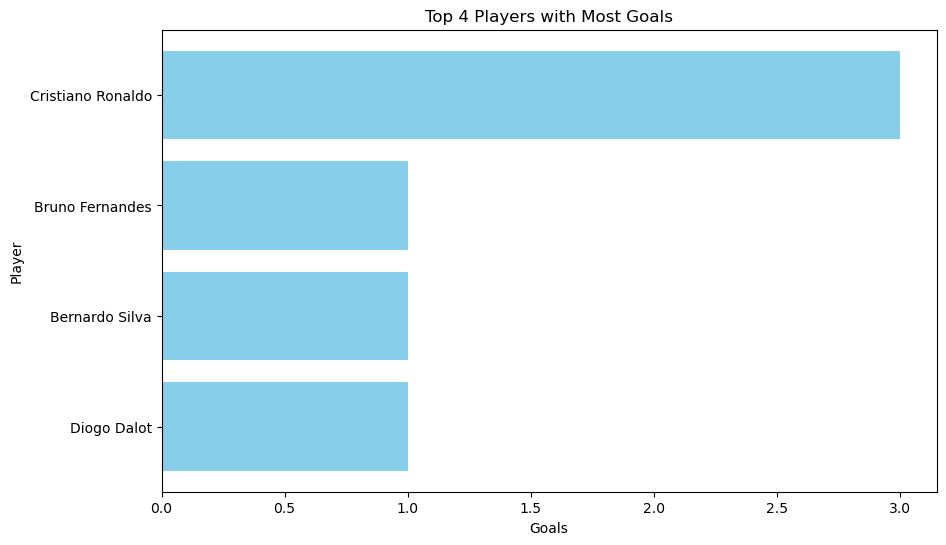

Top 4 Players with Most Goals in UEFA Nations League 2024-2025 (Ranked from Highest to Lowest):
Cristiano Ronaldo - 3.0 Goals
Bruno Fernandes - 1.0 Goals
Bernardo Silva - 1.0 Goals
Diogo Dalot - 1.0 Goals


In [213]:
# Convert the 'Gls' column to numeric (coerce errors to NaN if any non-numeric value exists)
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')

# Sort the DataFrame by 'Gls' in descending order and select the top 4 players
top_4_players = df.sort_values(by='Gls', ascending=False).head(4)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.barh(top_4_players['Player'], top_4_players['Gls'], color='skyblue')
plt.xlabel('Goals')
plt.ylabel('Player')
plt.title('Top 4 Players with Most Goals')
plt.gca().invert_yaxis()  # To display the highest goals at the top
plt.show()
# print
print("Top 4 Players with Most Goals in UEFA Nations League 2024-2025 (Ranked from Highest to Lowest):")
for index, row in top_4_players.iterrows():
    print(f"{row['Player']} - {row['Gls']} Goals")


# URL of third page to scrape

In [214]:
url = 'https://fbref.com/en/squads/795ca75e/2018-2019/Boca-Juniors-Stats'

# Use request to get the third page's HTML content

In [59]:
url = 'https://fbref.com/en/squads/795ca75e/2018-2019/Boca-Juniors-Stats'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


# Find the table with the specified 'id' and 'class' attributes

In [216]:
table = soup.find('table', {'id': 'stats_standard_21', 'class': 'stats_table sortable min_width now_sortable sticky_table eq1 re1 le1'})

# Extract the third table's tbody

In [217]:
table = soup.find_all('table')[0].tbody
for row in table.find_all('tr'):
    print(row.prettify())
    print('============================================')

<tr>
 <th class="left" csk="Andrada Esteban" data-append-csv="775d365e" data-stat="player" scope="row">
  <a href="/en/players/775d365e/Esteban-Andrada">
   Esteban Andrada
  </a>
 </th>
 <td class="left poptip" data-stat="nationality" data-tip="NT">
  <a href="/en/country/ARG/Argentina-Football">
   <span style="white-space: nowrap">
    <span class="f-i f-ar" style="">
     ar
    </span>
    ARG
   </span>
  </a>
 </td>
 <td class="center" csk="1.0" data-stat="position">
  GK
 </td>
 <td class="center" data-stat="age">
  27
 </td>
 <td class="right group_start" data-stat="games">
  18
 </td>
 <td class="right" data-stat="games_starts">
  18
 </td>
 <td class="right" csk="1620" data-stat="minutes">
  1,620
 </td>
 <td class="right" data-stat="minutes_90s">
  18.0
 </td>
 <td class="right iz group_start" data-stat="goals">
  0
 </td>
 <td class="right iz" data-stat="assists">
  0
 </td>
 <td class="right iz" data-stat="goals_assists">
  0
 </td>
 <td class="right iz" data-stat="goals_

# scrape data from third web page and store in DataFrame

In [219]:
#soup already contains the HTML content
table = soup.find_all('table')[0].tbody  # Extracting the table body

# Initialize a list to store data
data = []

# Loop through each row in the table body
for row in table.find_all('tr'):
    # Find all <th> and <td> cells in the row (headers and data cells)
    cells = row.find_all(['th', 'td'])
    
    # Ensure the row has at least 4 columns (Player, Nation, Pos, Age)
    if len(cells) >= 4:
        # Extract the relevant columns
        player_name = cells[0].text.strip()  # Player
        nation_name = cells[1].text.strip()  # Nation
        pos_name = cells[2].text.strip()    # Position
        age_name = cells[3].text.strip()    # Age
        
        # Append the data as a dictionary to the list
        data.append({
            "Player": player_name,
            "Nation": nation_name,
            "Pos": pos_name,
            "Age": age_name
        })

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Print the DataFrame to see the scraped data
print(df)


                   Player  Nation    Pos Age
0         Esteban Andrada  ar ARG     GK  27
1            Emmanuel Más  ar ARG     DF  29
2         Julio Buffarini  ar ARG     DF  29
3            Mauro Zárate  ar ARG  FW,MF  31
4       Carlos Izquierdoz  ar ARG     DF  29
5          Cristian Pavón  ar ARG  FW,MF  22
6            Carlos Tevez  ar ARG  MF,FW  34
7        Agustín Almendra  ar ARG     MF  18
8            Iván Marcone  ar ARG     MF  28
9          Nahitan Nández  uy URU     MF  22
10        Sebastián Villa  co COL  FW,MF  22
11        Darío Benedetto  ar ARG     FW  28
12            Paolo Goltz  ar ARG     DF  33
13            Ramón Ábila  ar ARG     FW  28
14          Fernando Gago  ar ARG     MF  32
15         Lisandro López  ar ARG     DF  28
16       Jorman Campuzano  co COL     MF  22
17          Edwin Cardona  co COL  FW,MF  25
18      Lisandro Magallán  ar ARG     DF  24
19        Emanuel Reynoso  ar ARG  MF,FW  22
20          Júnior Alonso  py PAR     DF  25
21        

# Question no 3
# Who is the oldest player in the given player statistics table, and what is their age?

In [221]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert the 'Age' column to numeric (extract only the number part before the dash if it's a range, e.g., '27-050' -> 27)
df['Age'] = df['Age'].apply(lambda x: int(x.split('-')[0]))

# Find the oldest player by sorting the DataFrame by 'Age' in descending order
oldest_player = df.sort_values(by='Age', ascending=False).iloc[0]

# Print the oldest player
print(f"The oldest player is {oldest_player['Player']} with an age of {oldest_player['Age']} years.")


The oldest player is Carlos Tevez with an age of 34 years.


# URL of the fourth webpage to scrape

In [60]:
url ='https://fbref.com/en/comps/season/2024-2025'

# Use requests to get the fourth page's HTML content

In [30]:
url ='https://fbref.com/en/comps/season/2024-2025'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the specified 'id' and 'class' attributes

In [61]:
table = soup.find('table', {'id': 'comps_intl_club_cup', 'class': 'sortable stats_table now_sortable'})

# Extract the fourth table's tbody

In [62]:
table = soup.find_all('table')[0].tbody
for row in table.find_all('tr'):
    print(row.prettify())
    print('============================================')

<tr>
 <th class="left" csk="Andrada Esteban" data-append-csv="775d365e" data-stat="player" scope="row">
  <a href="/en/players/775d365e/Esteban-Andrada">
   Esteban Andrada
  </a>
 </th>
 <td class="left poptip" data-stat="nationality" data-tip="NT">
  <a href="/en/country/ARG/Argentina-Football">
   <span style="white-space: nowrap">
    <span class="f-i f-ar" style="">
     ar
    </span>
    ARG
   </span>
  </a>
 </td>
 <td class="center" csk="1.0" data-stat="position">
  GK
 </td>
 <td class="center" data-stat="age">
  27
 </td>
 <td class="right group_start" data-stat="games">
  18
 </td>
 <td class="right" data-stat="games_starts">
  18
 </td>
 <td class="right" csk="1620" data-stat="minutes">
  1,620
 </td>
 <td class="right" data-stat="minutes_90s">
  18.0
 </td>
 <td class="right iz group_start" data-stat="goals">
  0
 </td>
 <td class="right iz" data-stat="assists">
  0
 </td>
 <td class="right iz" data-stat="goals_assists">
  0
 </td>
 <td class="right iz" data-stat="goals_

# scrape data from fourth web page and store in DataFrame 

In [39]:
# Initialize a list to store data 
data = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Find all cells in the row (both th for headers and td for data)
    cells = row.find_all(['td', 'th'])
    
    # Check that there are enough columns in the row
    if len(cells) >= 5:  # Adjusting this for table construct
        comp_name = cells[0].text.strip()  # Competition Name
        gender_name = cells[1].text.strip()  # Gender
        body_name = cells[2].text.strip()  # Governing Body
        champ_name = cells[3].text.strip()  # Champion
        score_name = cells[4].text.strip()  # Top Scorer
        
        # Append the row to the data list as a dictionary
        data.append({
            "Competition Name": comp_name,
            "Gender": gender_name,
            "Governing Body": body_name,
            "Champion": champ_name,
            "Top Scorer": score_name
        })

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# type df to view it as a table
df


,Competition Name,Gender,Governing Body,Champion,Top Scorer
0,Competition Name,Gender,Governing Body,Champion,Top Scorer
1,UEFA Champions League,M,UEFA,,"Harry Kane, Viktor Gyökeres... - 5"
2,UEFA Europa League,M,UEFA,,"Ayoub El Kaabi, Samu Omorodion... - 4"
3,UEFA Conference League,M,UEFA,,"Afimico Pululu, Christopher Nkunku... - 4"
4,UEFA Super Cup,M,UEFA,Real Madrid CF,"Federico Valverde, Kylian Mbappé - 1"
5,UEFA Women's Champions League,F,UEFA,,Pernille Harder - 4


# Which league has produced the top scorer in the UEFA competitions, and who is that top scorer?

# Ans: The league that produced the top scorer is: UEFA Champions League The top scorer is: Harry Kane, Viktor Gyökeres

# URL of the fifth webpage to scrape

In [ ]:
url = 'https://fbref.com/en/comps/'

# Use request to get the fifth page's HTML content

In [42]:
url = 'https://fbref.com/en/comps/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


# Find the table with the specified 'id' and 'class' attributes

In [43]:
table = soup.find('table', {'id': 'comps_intl_club_cup', 'class': 'sortable stats_table now_sortable'})

# Extract the fifth table's tbody

In [44]:
table = soup.find_all('table')[0].tbody
for row in table.find_all('tr'):
    print(row.prettify())
    print('============================================')

<tr class="gender-m">
 <th class="left" data-stat="league_name" scope="row">
  <a href="/en/comps/14/history/Copa-Libertadores-Seasons">
   Copa Libertadores de América
  </a>
 </th>
 <td class="center" data-stat="gender">
  M
 </td>
 <td class="left" data-stat="governing_body">
  CONMEBOL
 </td>
 <td class="left" csk="2014-2014" data-stat="minseason">
  <a href="/en/comps/14/2014/2014-Copa-Libertadores-Stats">
   2014
  </a>
 </td>
 <td class="left" csk="2024-2024" data-stat="maxseason">
  <a href="/en/comps/14/Copa-Libertadores-Stats">
   2024
  </a>
 </td>
 <td class="right" data-stat="tier">
  1st
 </td>
</tr>

<tr class="gender-m">
 <th class="left" data-stat="league_name" scope="row">
  <a href="/en/comps/205/history/Copa-Sudamericana-Seasons">
   Copa Sudamericana
  </a>
 </th>
 <td class="center" data-stat="gender">
  M
 </td>
 <td class="left" data-stat="governing_body">
  CONMEBOL
 </td>
 <td class="left" csk="2014-2014" data-stat="minseason">
  <a href="/en/comps/205/2014/20

# scrape data from fifth web page and store in DataFrame

In [45]:
# Initialize a list to store data
data = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Find all cells in the row (both th for headers and td for data)
    cells = row.find_all(['td', 'th'])
    
    # Check that there are enough columns in the row
    if len(cells) >= 6:  # Adjusting this for table construct
        comp_name = cells[0].text.strip()  # Competition Name
        gender_name = cells[1].text.strip()  # Gender
        body_name = cells[2].text.strip()  # Governing Body
        first_name = cells[3].text.strip()  # First Season
        last_name = cells[4].text.strip()  # last Season
        tier_name = cells[5].text.strip() # Tier        
        
        # Append the row to the data list as a dictionary
        data.append({
            "Competition Name": comp_name,
            "Gender": gender_name,
            "Governing Body": body_name,
            "First Season": first_name,
            "Last Season": last_name,
            "Tier" : tier_name
        })

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# type df to view it as a table
df

,Competition Name,Gender,Governing Body,First Season,Last Season,Tier
0,Copa Libertadores de América,M,CONMEBOL,2014,2024,1st
1,Copa Sudamericana,M,CONMEBOL,2014,2024,2nd
2,UEFA Champions League,M,UEFA,1990-1991,2024-2025,1st
3,UEFA Europa League,M,UEFA,1990-1991,2024-2025,2nd
4,UEFA Conference League,M,UEFA,2021-2022,2024-2025,3rd
5,UEFA Super Cup,M,UEFA,2000,2024,
6,UEFA Women's Champions League,F,UEFA,2014-2015,2024-2025,1st


# Which competitions are governed by UEFA?

# Ans: The competitions governed by UEFA are:
    UEFA Champions League
    UEFA Europa League
    UEFA Conference League
    UEFA Super Cup
    UEFA Women's Champions League